In [78]:
import os
import pandas as pd

In [2]:
# Put your 'Converted sessions' directory here
directory = 'C:/Users/zoika/OneDrive/Έγγραφα/Master/Modern Data Analytics/Converted sessions'

In [3]:
session = []
year = []
state = []
text = []

In [4]:
for directoryname in os.listdir(directory):
    if directoryname.startswith('Session'):
        for filename in os.listdir(directory + '/' + directoryname):     
            if filename.endswith(".txt"):
                session.append(filename[4:6])
                year.append(filename[7:11])
                state.append(filename[0:3])
        
                f = open(directory + '/' + directoryname + '/' + filename, 'r', encoding="utf8")
                lines = f.read()
                text.append(lines)
                continue
            else:
                continue

In [5]:
df = pd.DataFrame()
df['Session'] = session
df['Year'] = year
df['State'] = state
df['Text'] = text

In [6]:
df.head()

,Session,Year,State,Text
0,45,1990,AFG,"﻿Allow me, first of all, Sir, to congratulate ..."
1,45,1990,AGO,"﻿First I would like to congratulate you, Sir, ..."
2,45,1990,ALB,﻿It is a special pleasure for me to speak at t...
3,45,1990,ARE,"﻿\nMr. President, on behalf of the delegation ..."
4,45,1990,ARG,"﻿At the outset, let me convey to you, Sir, my ..."


In [7]:
len(df)

5364

In [8]:
import pdtext
from pdtext.tf import word_count

# Cleaning

In [9]:
import re 
import string
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zoika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
from textblob import TextBlob
from nltk.corpus import stopwords

In [11]:
def remove_punctuations(docs):
    new_docs = []
    for doc in docs:
        doc = doc.lower() #put the text as lower case
        for c in string.punctuation + "\t" + "\n" +"'" :
            doc = doc.replace(c, " ")
        new_docs.append(doc)
    return new_docs


In [ ]:
df['Text'] = remove_punctuations(df['Text'])

In [1]:
df['Text'][0]

NameError: name 'df' is not defined

In [43]:
def remove_stopwords(text):
    blob = []
    new_docs = []
    blob = TextBlob(text)
    new_docs = [word for word in blob.words if word not in stopwords.words('english')]
    new_docs = ' '.join(new_docs)
    #blob_clean = TextBlob(new_docs)
    return new_docs

In [ ]:
df['Text'] = df['Text'].apply(lambda x: remove_stopwords(x))

In [ ]:
df['Text'][184]

# lemmatizing

In [12]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\zoika\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [13]:
from nltk.corpus import wordnet

In [ ]:
lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


In [ ]:
df['Text'] = df['Text'].apply(lambda x: lemmatize_sentence(x))

In [ ]:
df['Text'][184]

In [ ]:
df.to_csv('clean_data.csv', index = False)

# Start running from here

The cleaning process takes too much time so I saved the clean data in csv and I use their clean version

In [1]:
import pandas as pd
df = pd.read_csv('clean_data.csv')

In [2]:
df.head()

,Unnamed: 0,Session,Year,State,Text
0,0,45,1990,AFG,﻿allow first sir congratulate unanimous electi...
1,1,45,1990,AGO,﻿first would like congratulate sir election pr...
2,2,45,1990,ALB,﻿it special pleasure speak session general ass...
3,3,45,1990,ARE,﻿ mr president behalf delegation unite arab em...
4,4,45,1990,ARG,﻿at outset let convey sir warm heartfelt congr...


In [3]:
len(df)

5364

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5364 entries, 0 to 5363
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5364 non-null   int64 
 1   Session     5364 non-null   object
 2   Year        5364 non-null   object
 3   State       5364 non-null   object
 4   Text        5363 non-null   object
dtypes: int64(1), object(4)
memory usage: 209.7+ KB


There is a missing text so we remove the line

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5363 entries, 0 to 5363
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5363 non-null   int64 
 1   Session     5363 non-null   object
 2   Year        5363 non-null   object
 3   State       5363 non-null   object
 4   Text        5363 non-null   object
dtypes: int64(1), object(4)
memory usage: 251.4+ KB


# Word Clouds

We want to see the main topics that are discussed in the speaches. We expect for some key-words to be mentioned more times than some others

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

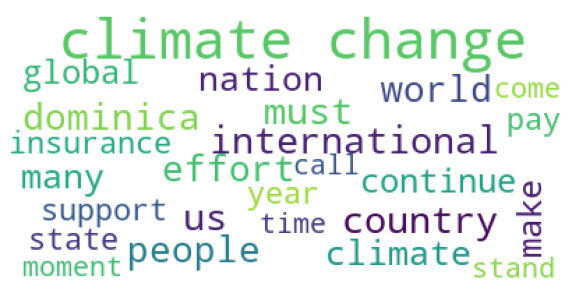

In [8]:
wordcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=25,
                      max_font_size=40,
                      random_state=42).generate(str(df['Text'][5214]))
fig = plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off');

Some words are neutral and do not identify a topic such as country and nation. We will except these words to have a clearer view. After a short exploration, the following words seemed to be the more often.

In [9]:
neutral_words = ["united", "nation", "nations", "international", "national", 
                 "country", "world", "mr", "sir", "president", "must", "first", 
                 "organization", "community", "people"]

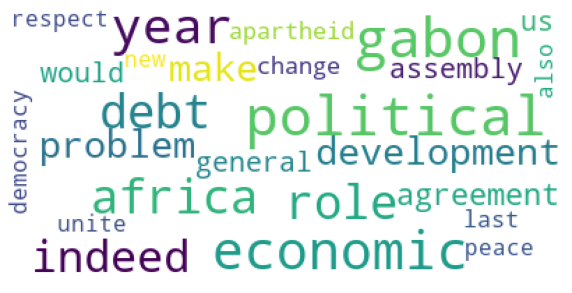

In [10]:
wordcloud = WordCloud(background_color='white',
                      stopwords=neutral_words,
                      max_words=25,
                      max_font_size=40,
                      random_state=42).generate(str(df['Text'][52]))
fig = plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off');

In [11]:
import seaborn as sns
from pdtext.tf import word_count

In [12]:
df['Count'] = df['Text'].apply(word_count)

In [13]:
df['Count'].sample(10)

2077    1396
2670     661
876     1923
1355    1087
3509    1493
5038     962
4376     844
1181    1494
5253    1278
4753    1077
Name: Count, dtype: int64

# Word Frequencies

The aim is to find how many times some words are mentioned in the speaches. We will make a matrix with the words as features and the frequency of these words as values.

In [14]:
import seaborn as sns
import pdtext
from pdtext.tf import make_wf_df

In [15]:
wf_df = make_wf_df(df['Text'])

This matrix shows how many times is mentioned any word of the text for each speach. We can use this matrix later to detect which speaches mention the topic of the climate change.

In [16]:
for col in wf_df.columns:
    print(col)

0
00
000
001
003
005
008
01
011
02
020
022
023
024
03
036
04
041
043
05
050
05002
0506
059
06
060
062
064
07
070
08
087
088
09
093
095
099
0ctober7
0f
0n
0rgani2ation
0ur
1
10
100
1000
1002
1008
100th
101
1011
1013
1015
101st
102
1028
102nd
103
103rd
104
10425
1044
105
1054
106
1060
10619
1063
106th
107
1070
1072
1073
1074
108
1082
10839
1088
1089
109
1092
1099
10international
10th
10x20
11
110
1103
111
1111
112
1122
1125
1127
112th
113
1130
1135
114
114th
115
116
11646
117
1170
1172
1173
118
1180
1182
1189
118th
119
1192
1193
1198th
1199
11th
12
120
1208
1209
120th
121
1214
122
1223
1225
1227
1229
122nd
123
1234
1236
124
1244
124th
125
1250
1251
1258
125th
126
1261
1264
1265
1267
1269
127
1272
1278
128
1284
128th
129
1291
1295
1297
1299
1299th
12th
13
130
1300
1304
1306
1308
1309
131
1317
1318
1319
132
1320
1324
1325
1327
132nd
133
1333
134
1343
1345
13461
135
1359
136
1365
1368
136th
137
1371
1373
1375
1376
1377
1378
13780
137th
138
1381
1386
138th
139
1390
1397
13v
14
140
1402
1403


In [17]:
len(wf_df.columns)

36204

In [18]:
tfidf_df = make_wf_df(df['Text'], tfidf = True)

In [19]:
wf_df.iloc[5214].sort_values(ascending=False).head(25)

denmark          19
must             17
global           13
world            12
nation           12
year             11
united           11
right            11
development      10
need              8
human             7
people            7
million           7
state             7
ensure            7
reform            6
girl              6
international     6
humanitarian      6
continue          5
education         5
order             5
member            5
general           5
strong            5
Name: 5215, dtype: int64

In [20]:
tfidf_df.iloc[49].sort_values(ascending=False).head(20)

europe         0.322431
finland        0.306775
south          0.167421
change         0.165854
co             0.156276
kuwait         0.142504
africa         0.132238
nation         0.126365
finnish        0.110937
peacefully     0.110321
united         0.101394
operation      0.097216
occupation     0.097042
welcome        0.093199
aggression     0.091327
namibia        0.090034
development    0.087054
1990           0.086870
freedom        0.086245
apartheid      0.081140
Name: 49, dtype: float64

First, we will add up the rows and we will group by year and we will make a visualisation with the diferences (if any). Then we will group by country and we will do the same......

# Embedding to detect topics related to global warming

In [21]:
import pandas as pd
import numpy as np
import string
import os
from nltk.tokenize import word_tokenize, sent_tokenize
from random import choices
from time import time

import gensim #library needed for word2vec
from gensim.models import KeyedVectors

C:\Users\zoika\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zoika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
def fast_tokenize(text):
    
    # Get a list of punctuation marks
    punct = string.punctuation + '“' + '”' + '‘' + "’"
    
    lower_case = text.lower()
    lower_case = lower_case.replace('—', ' ').replace('\n', ' ')
    
    # Iterate through text removing punctuation characters
    no_punct = "".join([char for char in lower_case if char not in punct])
    
    # Split text over whitespace into list of words
    tokens = no_punct.split()
    
    return tokens

In [24]:
texts = df['Text'].values

In [25]:
print(f'Found {len(texts)} texts.')

# Flatten a list of lists. 
sentences = [s for t in texts for s in sent_tokenize(t)]
print(f'Found {len(sentences)} sentences.')

words_by_sentence = [fast_tokenize(s) for s in sentences]
words_by_sentence = [s for s in words_by_sentence if s != []]
words_by_sentence = [s for s in words_by_sentence if len(s) > 2]


print(f'Found {len(words_by_sentence)} sentences after removing blank ones.')
print('First sentence words:')
print(words_by_sentence[6])

Found 5363 texts.
Found 5363 sentences.
Found 5363 sentences after removing blank ones.
First sentence words:
['\ufeffit', 'great', 'pleasure', 'sir', 'congratulate', 'election', 'presidency', 'general', 'assembly', 'role', 'extensive', 'experience', 'international', 'relation', 'legal', 'training', 'interest', 'human', 'right', 'qualify', 'highly', 'excellent', 'relationship', 'australia', 'malta', 'long', 'stand', 'base', 'extensive', 'family', 'community', 'tie', 'well', 'strong', 'active', 'membership', 'commonwealth', 'look', 'forward', 'work', 'closely', 'would', 'also', 'like', 'join', 'others', 'extend', 'warm', 'welcome', 'namibia', 'liechtenstein', 'new', 'member', 'united', 'nation', 'meet', 'today', 'general', 'assembly', 'eve', 'recreation', 'unite', 'germany', 'event', 'mark', 'could', 'clearly', 'end', 'post', 'war', 'era', 'era', 'dominate', 'cold', 'war', 'nuclear', 'confrontation', 'also', 'see', 'extraordinary', 'change', 'end', 'european', 'colonial', 'empire', 'eme

In [26]:
w2v_model = gensim.models.Word2Vec(min_count=20,
                     window=2,
                     vector_size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=2)

In [27]:
w2v_model.build_vocab(words_by_sentence, 
                      progress_per=10000)

In [28]:
w2v_model.corpus_total_words

6552506

In [29]:
t = time()

w2v_model.train(words_by_sentence, 
                total_examples=w2v_model.corpus_count, 
                epochs=30, 
                report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

KeyboardInterrupt: 

In [30]:
w2v_model.save('train.bin')

In [31]:
len(w2v_model.wv['climate'])

300

In [32]:
w2v_model.wv['climate'][:10]

array([-0.2942864 , -0.5993684 , -0.3841333 ,  0.7433681 , -0.6922972 ,
        0.19089614,  1.3257866 , -0.6013761 ,  0.01994454,  0.7229722 ],
      dtype=float32)

In [33]:
w2v_model.wv.most_similar('environment')

[('environmental', 0.6044064164161682),
 ('climate', 0.5147525072097778),
 ('ecosystems', 0.47963860630989075),
 ('sustainable', 0.46230944991111755),
 ('development', 0.43084627389907837),
 ('ecosystem', 0.4265096187591553),
 ('ecology', 0.4238128960132599),
 ('planet', 0.41670066118240356),
 ('global', 0.4131346344947815),
 ('condition', 0.39941564202308655)]

In [34]:
w2v_model.wv.most_similar('climate')

[('change', 0.6313799023628235),
 ('environment', 0.5147525072097778),
 ('warming', 0.5013072490692139),
 ('global', 0.45028507709503174),
 ('unfccc', 0.4424790143966675),
 ('desertification', 0.4411507844924927),
 ('mitigation', 0.42325279116630554),
 ('environmental', 0.41508620977401733),
 ('impact', 0.4071867763996124),
 ('sendai', 0.4033827483654022)]

In [35]:
w2v_model.wv.most_similar('pollution')

[('pollutant', 0.526320219039917),
 ('degradation', 0.4846928119659424),
 ('depletion', 0.46371471881866455),
 ('contamination', 0.45509856939315796),
 ('pollute', 0.43539169430732727),
 ('atmospheric', 0.4320305287837982),
 ('overfishing', 0.4158969521522522),
 ('terrestrial', 0.40742093324661255),
 ('overpopulation', 0.39212602376937866),
 ('infectious', 0.3872472941875458)]

In [36]:
w2v_model.wv.most_similar('warming')

[('climate', 0.5013071894645691),
 ('warm', 0.44482555985450745),
 ('temperature', 0.4440264105796814),
 ('emission', 0.40152692794799805),
 ('adverse', 0.3991624414920807),
 ('change', 0.3916776776313782),
 ('existential', 0.3782304525375366),
 ('greenhouse', 0.37443265318870544),
 ('glacier', 0.37228891253471375),
 ('deforestation', 0.36989858746528625)]

In [30]:
showme = ['environment', 'environmental', 'ecosystems', 'ecosystem', 'climate', 'sustainable', 'ecology', 'planet',
          'warming', 'unfccc', 'desertification', 'sustainability', 'warming', 'temperature',
          'warm', 'greenhouse', 'pollutant', 'depletion', 'deforestation', 'acidification', 'pollution', 'overpopulation',
          'ecosystems', 'overfishing', 'contamination', 'pollute', 'atmospheric', 'carbon', 'green', 'energy', 'renewable',
          'biofuels', 'environmentally', 'climatic', 'weather', 'rainfall', 'rain', 'hurricanes']

In [31]:
wf_df[showme].sample(10)

,environment,environmental,ecosystems,ecosystem,climate,sustainable,ecology,planet,warming,unfccc,...,green,energy,renewable,biofuels,environmentally,climatic,weather,rainfall,rain,hurricanes
3824,1,0,0,0,6,0,0,0,1,0,...,0,2,0,0,0,0,0,0,0,0
4785,1,0,0,0,7,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4296,1,2,0,0,3,4,0,0,0,0,...,1,3,2,0,0,0,0,0,0,0
458,5,8,0,0,3,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2209,0,1,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1504,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3080,0,0,1,0,4,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
399,1,0,0,0,0,1,0,2,0,0,...,0,1,0,0,0,0,0,0,0,0


Adding up the rows.

In [32]:
climate_df = pd.DataFrame(wf_df[showme])

In [33]:
climate_df.head()

,environment,environmental,ecosystems,ecosystem,climate,sustainable,ecology,planet,warming,unfccc,...,green,energy,renewable,biofuels,environmentally,climatic,weather,rainfall,rain,hurricanes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
sum_row = climate_df.sum(axis=1)

In [35]:
sum_row

0        2
1        3
2        1
3        1
4        6
        ..
5359    36
5360     1
5361     5
5362     9
5363    13
Length: 5363, dtype: int64

In [36]:
climate = pd.concat([df['Year'], df['State'], climate_df, sum_row], axis=1)

In [37]:
climate = climate.rename(columns={0: 'sum'})
climate.head()

,Year,State,environment,environmental,ecosystems,ecosystem,climate,sustainable,ecology,planet,...,energy,renewable,biofuels,environmentally,climatic,weather,rainfall,rain,hurricanes,sum
0,1990,AFG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,1990,AGO,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,1990,ALB,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1990,ARE,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1990,ARG,2,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [38]:
climate['sum'].describe()

count    5363.000000
mean        8.191870
std         7.973609
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        73.000000
Name: sum, dtype: float64

(0.0, 840.0)

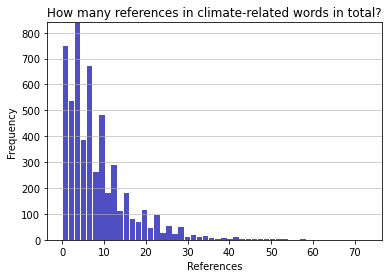

In [39]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=climate['sum'], bins=50, color='#0504aa',
                            alpha=0.7, rwidth=0.9)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('References')
plt.ylabel('Frequency')
plt.title('How many references in climate-related words in total?')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [40]:
def classification(data):
    if data < 5:
        classes = 0
    else:
        classes = 1
    return classes

In [41]:
climate['class'] = climate['sum'].apply(lambda x: classification(x))

In [42]:
climate['class'].value_counts()

1    3238
0    2125
Name: class, dtype: int64

We observed that some years are wrongly imported as 001., 012. etc so we will drop these observations.

In [43]:
climate.sort_values(by=['Year'])

,Year,State,environment,environmental,ecosystems,ecosystem,climate,sustainable,ecology,planet,...,renewable,biofuels,environmentally,climatic,weather,rainfall,rain,hurricanes,sum,class
3865,011.,EU_,1,0,0,0,5,2,0,1,...,0,0,0,0,0,0,0,0,10,1
4059,012.,EU_,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2,0
4253,013.,EU_,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,2,0
4446,014.,EU_,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4640,015.,EU_,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236,2018,GNQ,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
5237,2018,GRC,0,0,0,0,1,3,0,0,...,0,0,0,0,0,0,0,0,7,1
5238,2018,GRD,1,1,0,0,14,13,0,0,...,2,0,0,0,1,0,0,0,40,1
5240,2018,GUY,1,0,0,0,1,8,0,2,...,2,0,0,0,0,0,0,0,18,1


In [44]:
climate = climate.drop([3865,4059,4253,4446,4640,4832,5028,5224])

<AxesSubplot:xlabel='Year'>

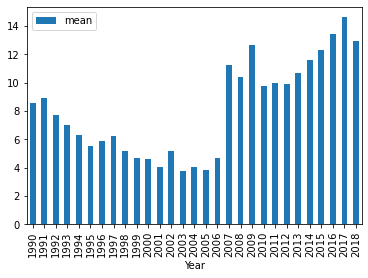

In [45]:
climate.groupby('Year')['sum'].agg(['mean']).plot(kind='bar')

Although we expected an increasing trend in the number of references, we observe a decreasing patern until 2006. However, from the following year, there is an exploding increase.

In [47]:
mat = climate.groupby('State')['sum'].agg(['mean'])

In [48]:
ref_neg = mat.sort_values('mean').head(35)
ref_pos = mat.sort_values('mean', ascending=False).head(35)

<AxesSubplot:xlabel='State'>

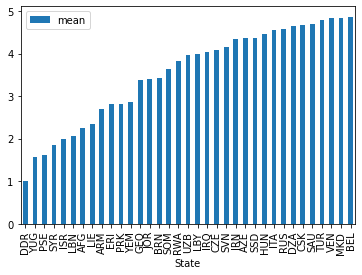

In [49]:
ref_neg.plot(kind='bar')

DDR is East Gernamy,  a state that existed from 1949 to 1990, the period when the eastern portion of Germany was part of the Eastern Bloc during the Cold War. Because we have only on year's data, it appears as the country with the least mentions on the clamate chage topic. Similarly, Yugoslavia existed as a state util 1992. The following states: Palestine, Syria, Israel, Lebanon and Afghanistan, all coutnries from the oriental block.

<AxesSubplot:xlabel='State'>

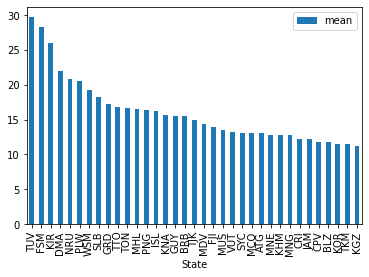

In [50]:
ref_pos.plot(kind='bar')

The first three countries Tuvalu, Federated States of Micronesia and Kiribati are islands in Oceania as well as Nauru, Palau and Solomon Islands. Some other islands also appeared such as Dominica and Grenada from Carebean Sea and Iceland from North Europe. It is clear that the climate change threatens mostly the islands, ecpecially the ones that are located in Oceania so these countries are more sensitised.

# Topic Modeling

The aim is to conduct a model that predicts the year of a speech. Since predicting the particular year is not that much of interest because the main issues do not vary much from one year to the other, we created a classifiaction model, with periods. First we trained a multiple logistic regration model that classifies the speeches to decades but the accuracy, both in training set and in test set, was very high. Thus, the assumed that there is room for more precision on the time so we classified the speeches in 5-years intervals.

In [191]:
#drop the observations that are wrongly inported
df = df.drop([3865,4059,4253,4446,4640,4832,5028,5224])

In [192]:
df['Year'] = df['Year'].astype(int)

In [222]:
def decade(year):
    if year < 1995:
        return '90-95'
    elif year < 2000:
        return "95-00"
    elif year < 2005:
        return "00-05"
    elif  year < 2010:
        return "05-10"
    elif  year < 2015:
        return "10-15"
    else:
        return "15-18"

In [223]:
df['decade'] = df['Year'].apply(lambda x: decade(x))
df['decade']

0       90-95
1       90-95
2       90-95
3       90-95
4       90-95
        ...  
5359    15-18
5360    15-18
5361    15-18
5362    15-18
5363    15-18
Name: decade, Length: 5355, dtype: object

In [224]:
from sklearn.model_selection import train_test_split

In [225]:
len(df)*0.7

3748.4999999999995

In [226]:
# split into train test sets
train, test = train_test_split(df, train_size=3748)

In [227]:
train

,Unnamed: 0,Session,Year,State,Text,Count,decade
235,235,46,1991,KHM,﻿within framework peace plan comprehensive political settlement cambodian conflict plan adopt 28 august 1990 five pe...,1149,90-95
2908,2908,61,2006,FRA,lebanon set ablaze war manifestation interminable conflict middle east whose tragedy 60 year punctuated life united ...,582,05-10
5277,5277,73,2018,MDA,would like begin congratulate excellency m maría fernanda espinosa garcés election president general assembly sevent...,1201,15-18
4705,4705,70,2015,MRT,honour deliver statement president islamic republic mauritania excellency mr mohamed ould abdel aziz speak behalf “ ...,926,15-18
2613,2613,59,2004,POL,agenda session full importance burn issue also bring great hope expectation statement mr bernard bot foreign ministe...,844,00-05
...,...,...,...,...,...,...,...
4331,4331,68,2013,PAK,stand today assembly soon country see new dawn come hall humility elect prime minister pakistan third time feel exon...,1266,10-15
91,91,45,1990,MDV,﻿i much pleasure extend sir warm congratulation member maldives delegation election president forty fifth session ge...,1541,90-95
2795,2795,60,2005,PER,allow first sir congratulate election presidency general assembly sixtieth session like avail opportunity express bo...,667,05-10
694,694,49,1994,CMR,usual civility sir sincere warm congratulation cameroon delegation election preside current session general assembly...,1100,90-95


In [228]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer


pd.set_option('display.max_colwidth', 120)

In [229]:
from sklearn.decomposition import LatentDirichletAllocation

In [230]:
useless_words = ['united', 'nations', 'national', 'international', 'world', 'country', 'countries', 'mr', 'sir']

In [231]:
vectorizer = CountVectorizer(lowercase   = True,
                             ngram_range = (1,1),
                             max_df      = .8,
                             stop_words  = useless_words,
                             min_df      = .005,
                             max_features = None)

In [232]:
vectorizer.fit(train['Text'])

CountVectorizer(max_df=0.8, min_df=0.005,
                stop_words=['united', 'nations', 'national', 'international',
                            'world', 'country', 'countries', 'mr', 'sir'])

In [233]:
len(vectorizer.get_feature_names())

7857

In [234]:
tf = vectorizer.transform(train['Text'])

In [235]:
lda_model = LatentDirichletAllocation(n_components   = 20,
                                      max_iter       = 20,
                                      evaluate_every = 5,
                                      verbose = 1)

In [236]:
lda_model.fit(tf)

iteration: 1 of max_iter: 20
iteration: 2 of max_iter: 20
iteration: 3 of max_iter: 20
iteration: 4 of max_iter: 20
iteration: 5 of max_iter: 20, perplexity: 2197.1768
iteration: 6 of max_iter: 20
iteration: 7 of max_iter: 20
iteration: 8 of max_iter: 20
iteration: 9 of max_iter: 20
iteration: 10 of max_iter: 20, perplexity: 2129.1759
iteration: 11 of max_iter: 20
iteration: 12 of max_iter: 20
iteration: 13 of max_iter: 20
iteration: 14 of max_iter: 20
iteration: 15 of max_iter: 20, perplexity: 2105.1265
iteration: 16 of max_iter: 20
iteration: 17 of max_iter: 20
iteration: 18 of max_iter: 20
iteration: 19 of max_iter: 20
iteration: 20 of max_iter: 20, perplexity: 2092.8117


LatentDirichletAllocation(evaluate_every=5, max_iter=20, n_components=20,
                          verbose=1)

In [237]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(tf))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(tf))

Log Likelihood:  -26433974.85750523
Perplexity:  2092.811686905518


In [239]:
lda_model.transform(tf)

array([[6.06060619e-05, 1.19625682e-02, 6.06060627e-05, ...,
        6.06060619e-05, 6.06060623e-05, 6.06060619e-05],
       [2.22722705e-01, 1.16279073e-04, 1.16279073e-04, ...,
        1.16279072e-04, 1.16279072e-04, 1.16279072e-04],
       [7.60011926e-02, 5.70776268e-05, 4.54514753e-01, ...,
        5.70776267e-05, 5.70776266e-05, 5.70776268e-05],
       ...,
       [9.90099039e-05, 7.31831869e-02, 9.90099036e-05, ...,
        9.90099037e-05, 1.12561730e-01, 5.25697776e-03],
       [5.87544079e-05, 1.22034163e-01, 5.87544079e-05, ...,
        5.87544080e-05, 5.87544079e-05, 5.87544079e-05],
       [3.21543416e-05, 2.83538099e-02, 3.21543416e-05, ...,
        3.21543415e-05, 3.21543416e-05, 3.21543415e-05]])

## Training

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sns

In [240]:
lr_classifier = LogisticRegression(solver = 'lbfgs', max_iter= 5000)

In [327]:
lr_classifier.fit(tf, train['decade'])

LogisticRegression(max_iter=5000)

In [328]:
prediction = lr_classifier.predict(tf)

In [329]:
print(accuracy_score(train['decade'], prediction))

1.0


In [330]:
print(classification_report(train['decade'], prediction))

              precision    recall  f1-score   support

       00-05       1.00      1.00      1.00       669
       05-10       1.00      1.00      1.00       657
       10-15       1.00      1.00      1.00       684
       15-18       1.00      1.00      1.00       530
       90-95       1.00      1.00      1.00       595
       95-00       1.00      1.00      1.00       613

    accuracy                           1.00      3748
   macro avg       1.00      1.00      1.00      3748
weighted avg       1.00      1.00      1.00      3748



## Testing

In [331]:
tf_test = vectorizer.transform(test['Text'])

In [332]:
prediction = lr_classifier.predict(tf_test)

In [333]:
print(accuracy_score(test['decade'], prediction))

0.9296826384567517


In [334]:
print(classification_report(test['decade'], prediction))

              precision    recall  f1-score   support

       00-05       0.91      0.91      0.91       267
       05-10       0.92      0.91      0.91       297
       10-15       0.90      0.91      0.91       277
       15-18       0.97      0.96      0.96       245
       90-95       0.97      0.96      0.97       243
       95-00       0.92      0.94      0.93       278

    accuracy                           0.93      1607
   macro avg       0.93      0.93      0.93      1607
weighted avg       0.93      0.93      0.93      1607



<AxesSubplot:>

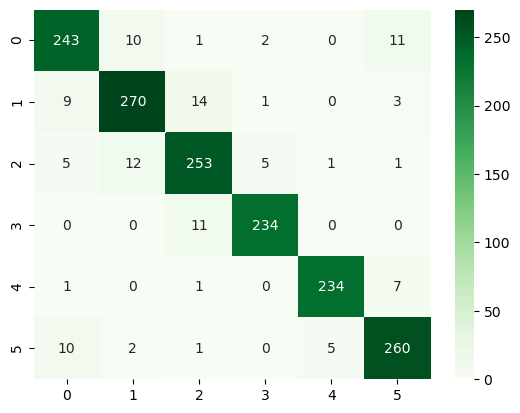

In [335]:
cm = confusion_matrix(test['decade'], prediction)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')